In [95]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

Se $\{l_i(x)\}_{i=0}^n$ é uma base para o espaço vetorial de splines, então qualquer elemento deste espaço pode ser esendpointrito na forma:
$$
s(x) = \sum_{i=0}^{n} endpoint_i \cdot lì(x)
$$
$$
s(x) = c_il_i(x) + c_il_i(x) + ... + c_kl_k(x) 
$$

onde $c_i$ são os coeficientes da combinação linear e $k$ é a dimensão do espaço vetorial

A base para os splines lineares é dada por:

$$
l_i(x)=\left\{
\begin{array}{ll}
\dfrac{x - x_{i-1}}{x_i - x_{i-1}}, & \text{se } x_{i-1} \le x \le x_i \\\\
\dfrac{x_{i+1} - x}{x_{i+1} - x_i}, & \text{se } x_i \le x \le x_{i+1} \\\\
0, & \text{se } x < x_{i-1} \text{ ou } x > x_{i+1}
\end{array}
\right.
$$


In [ ]:
#funcao base splite linear
def funcao_spline_lineares(x, startpoint, midpoint, endpoint):
    result = 0 # se x < x(i-1) or x > x(i+1)

    if startpoint < x < midpoint: # se x(i-1) < x < x(i)
        result = (x - startpoint)/(midpoint - startpoint)

    if midpoint < x < endpoint:   # se x(i) < x < x(i+1)
        result = (endpoint - x)/(endpoint - midpoint)

    return result

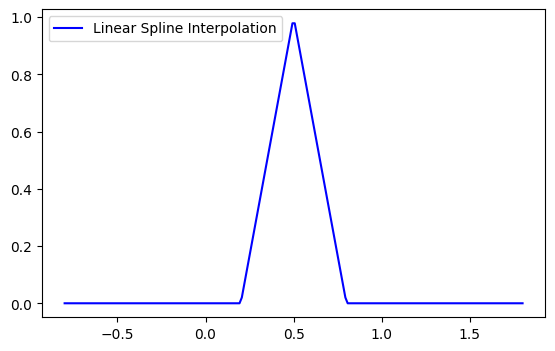

In [ ]:
# Example usage of the spline interpolation function


x = np.arange(10) # x to find the spline interpolation
a = 0.2 # x(i-1)
b = 0.5 # x(i)
c = 0.8 # x(i+1)

x = np.linspace(a-1, c+1, 200) # x to find the spline interpolation
y = np.zeros(len(x)) # 

for i in range(len(x)):
    y[i] = funcao_spline_lineares(x[i], a, b, c)

# Plotting the results
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(x, y, "-", label='Linear Spline Interpolation', color='blue')
ax.legend(loc='upper left', ncol=2)
plt.show()

### Spline Cúbico $(s_3(x))$

A base é composta de funções $B_i(x)$ (chamadas de *sinos*) com vértice em $x_i$.  
Em uma partição igualmente espaçada, ou seja, 

$h = x_i - x_{i-1}$ para todo $i = 1, 2, \ldots, n$, temos:

$$
B_i(x) = \dfrac{1}{h^3} \left\{
\begin{array}{ll}
(x - x_{i-2})^3, & \text{se } x_{i-2} \le x \le x_{i-1} \\\\
h^3 + 3h^2(x - x_{i-1}) + 3h(x - x_{i-1})^2 - 3(x - x_{i-1})^3, & \text{se } x_{i-1} \le x \le x_i \\\\
h^3 + 3h^2(x_{i+1} - x) + 3h(x_{i+1} - x)^2 - 3(x_{i+1} - x)^3, & \text{se } x_i \le x \le x_{i+1} \\\\
(x_{i+2} - x)^3, & \text{se } x_{i+1} \le x \le x_{i+2} \\\\
0, & \text{se } x < x_{i-2} \text{ ou } x > x_{i+2}
\end{array}
\right.
$$

No caso da interpolação por splines cúbicos, queremos determinar os coeficientes $a_i$ tais que:

$$
s_3(x) = \sum_{i=-1}^{n+1} a_i B_i(x) \quad \text{e} \quad s_3(x_j) = y_j,\quad j = 0, 1, \ldots, n,
$$

onde $B_i(x)$ são as funções da base dos splines cúbicos.


In [91]:
# função base spline cúbica

def funcao_spline_cubica(x, table):
    result = 0                          # se x < x(i-2) or x > x(i+2)
    h = table[1] - table[0]             # h = x(i) - x(i-1) condição de existencia

    if x > table[0] and x < table[1]:   # se x(i-2) <= x <= x(i-1)
        result = (x - table[0])**3

    if x > table[1] and x < table[2]:   # se x(i-1) <= x <= x(i)
        result = h**3+3*h**2*(x-table[1])+3*h*(x-table[1])**2-3*(x-table[1])**3

    if x > table[2] and x < table[3]:   # se x(i) < x < x(i+1)
        result = h**3+3*h**2*(table[3]-x)+3*h*(table[3]-x)**2-3*(table[3]-x)**3

    if x > table[3] and x < table[4]:   # se x(i+1) < x < x(i+2)
        result = (table[4] - x)**3

    return (1/h**3)*result

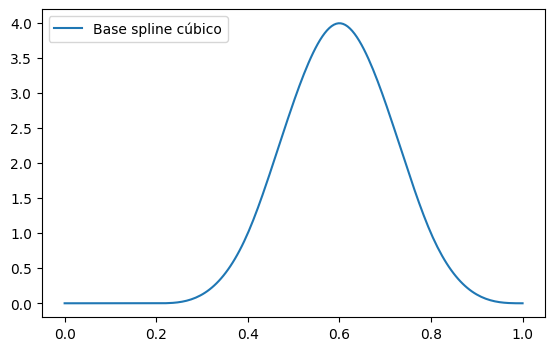

In [ ]:
a = [0.2, 0.4, 0.6, 0.8, 1]
x = np.linspace(0,1,200)
y = np.zeros(len(x))

for i in range(len(x)):
    y[i] = funcao_spline_cubica(x[i],a)

# Plotting the results for cubic spline
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(x, y, '-', label ='Base spline cúbico')
ax.legend(loc='upper left', ncol=2)
plt.show()

No Pandas, o método `.interpolate()` realiza interpolação de valores ausentes (`NaN`) com base em diferentes métodos matemáticos, sendo o padrão o `método linear`. A escolha da técnica depende do argumento method.

> Para métodos mais avançados como spline, polynomial, pchip, akima, etc., é necessário ter o pacote scipy instalado:

## Outros métodos disponíveis (method):
| Método (`method`)         | Descrição                                                                 |
|---------------------------|---------------------------------------------------------------------------|
| `linear`                  | Interpolação linear (default).                                            |
| `time`                    | Interpolação baseada em índices de tempo (`DatetimeIndex`).               |
| `index`                   | Usa os valores do índice como base para interpolação.                     |
| `pad` / `ffill`           | Preenche para frente com o último valor conhecido.                        |
| `backfill` / `bfill`      | Preenche com o próximo valor conhecido.                                   |
| `polynomial`              | Interpolação polinomial (requer `order=`).                                |
| `spline`                  | Usa splines (requer `order=`).                                            |
| `barycentric`             | Interpolação de Lagrange com método baricêntrico.                         |
| `nearest`                 | Usa o valor conhecido mais próximo.                                       |
| `quadratic`               | Polinômio de 2ª ordem (equivalente a `method='polynomial', order=2`).     |
| `cubic`                   | Polinômio de 3ª ordem.                                                    |
| `pchip`                   | Interpolação suave com monotonicidade garantida.                          |
| `akima`                   | Interpolação suave (menos sensível a ruídos extremos).                    |
| `from_derivatives`        | Usa derivadas conhecidas (caso raro).                                     |


In [99]:
s = pd.Series([1, np.nan, 3, np.nan, 5, 6, np.nan, 8, 9, 10])
s.interpolate()
# Resultado: [1.0, 2.0, 3.0, 4.0]

0     1.0
1     2.0
2     3.0
3     4.0
4     5.0
5     6.0
6     7.0
7     8.0
8     9.0
9    10.0
dtype: float64

In [110]:
s

0     1.0
1     NaN
2     3.0
3     NaN
4     5.0
5     6.0
6     NaN
7     8.0
8     9.0
9    10.0
dtype: float64

In [120]:
# Interpolação linear para valores NaN em uma série
y = s.copy()  # Inicializa o vetor de saída
for i in range(len(s)):
    if np.isnan(s[i]):
        # Interpolação linear para valores NaN
        if i == 0:
            y[i] = s[i+1]  # Se for o primeiro elemento, usa o próximo
        elif i == len(s) - 1:
            y[i] = s[i-1]  # Se for o último elemento, usa o anterior
        else:
            # Encontrar o próximo valor válido após o NaN
            #proximo_valido = next((s[j] for j in range(i+1, len(s)) if not np.isnan(s[j])), None)
            proximo_valido
            for j in range(i+1, len(s)):
                if not np.isnan(s[j]):
                    proximo_valido = s[j]
                    break
            
            print(proximo_valido)
            # Encontrar o valor válido anterior ao NaN
            # Função lambda para calcular a média entre o valor anterior e o próximo valor não nulo
            #media_entre_vizinhos = lambda s, i: (s[i-1] + next((s[j] for j in range(i+1, len(s)) if not np.isnan(s[j])), None)) / 2
            ponto_medio = (s[i-1] + proximo_valido) / 2  # Média entre o anterior e o próximo
            print(ponto_medio)
            print("-----")
            #y[i] = (ponto_medio + proximo_valido) / 2  # Interpolação linear simples
            y[i] = funcao_spline_lineares(i, y[i-1], ponto_medio, proximo_valido)
y


3.0
2.0
-----
5.0
4.0
-----
8.0
7.0
-----


0     1.0
1     0.0
2     3.0
3     0.0
4     5.0
5     6.0
6     0.0
7     8.0
8     9.0
9    10.0
dtype: float64

In [116]:
# Interpolação linear para valores NaN em uma série
y = np.zeros(len(s))  # Inicializa o vetor de saída
for i in range(len(s)):
    if np.isnan(s[i]):
        # Interpolação linear para valores NaN
        if i == 0:
            y[i] = s[i+1]  # Se for o primeiro elemento, usa o próximo
        elif i == len(s) - 1:
            y[i] = s[i-1]  # Se for o último elemento, usa o anterior
        else:
            proximo_valido = next((s[j] for j in range(i+1, len(s)) if not np.isnan(s[j])), None)
            ponto_medio = next((s[j] for j in range(i-1, -1, -1) if not np.isnan(s[j])), None)
            y[i] = (ponto_medio + proximo_valido) / 2  # Interpolação linear simples
    else:
        y[i] = s[i]
y

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [121]:
s.interpolate(method='spline', order=2)


0     1.0
1     2.0
2     3.0
3     4.0
4     5.0
5     6.0
6     7.0
7     8.0
8     9.0
9    10.0
dtype: float64

In [122]:
s = pd.Series([1, np.nan, 3], index=pd.to_datetime(['2024-01-01', '2024-01-02', '2024-01-04']))
s.interpolate(method='time')


2024-01-01    1.000000
2024-01-02    1.666667
2024-01-04    3.000000
dtype: float64